## 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Data cleaning
#### 3. The elbow technique
#### 4. K-means clustering
#### 5. Create visualizations
#### 6. Discuss the clusters
#### 7. Calculate the descriptive statistics

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
# Ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = r'C:\Desktop\Careerfoundry\2. Data Analytics Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\6.5 Unsupervised Machine Learning Clustering'

In [4]:
df = pd.read_csv(os.path.join(path, '5. Data_cleaned.csv'))

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### 2.1 Eliminate unnecessary columns

I will remove certain columns based on the criteria, as k-means clustering requires all variables to be numerical to calculate distances between data points effectively:

Eliminated Columns Due to Data Type:

Columns such as 'Unnamed: 0', 'id', 'date', and 'zipcode' are excluded because they are either string or datetime data types, which are not suitable for k-means clustering.

In [7]:
# Store necessary column for the k-mmeans analysis in df_kmeans variable
df = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
         'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'zipcode', 'sqft_living15', 'sqft_lot15']]

In [8]:
df.shape

(20279, 20)

#### 2.2 Check for missing values

In [9]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values found

#### 2.3 Check for duplicates

In [10]:
dups = df.duplicated()
dups.shape

(20279,)

No duplicates found

#### 2.5 Standardize data

The difference between variables’ scales can’t be too large which might lead to some biases. The range of values in the columns (especailly the price column) are much larger compared to the other columns. To address this, I will use StandardScaler tool to standardize this different scales from the dataset.

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [12]:
# Fit and transform the data (standardize all columns)
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

##### Comparing that the original dataset and standardized dataset hace the consistent values at the same index of each other

In [13]:
# Standardized dataset
scaled_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,zipcode,sqft_living15,sqft_lot15
0,0.875917,-1.226187,-0.359728,-1.487018,-1.052369,-0.220501,-0.880086,-0.054475,-0.266227,-0.629133,-0.501552,-0.728166,-0.777237,-0.536249,-0.197188,-0.323944,-0.301476,1.859061,-0.951450,-0.258582
1,0.627303,0.315245,-0.359728,0.302908,0.844355,-0.179647,0.982788,-0.054475,-0.266227,-0.629133,-0.501552,0.684404,1.286609,-0.673398,5.071297,1.163098,-0.737678,0.866405,-0.367380,-0.179670
2,0.355261,-1.430508,-1.494947,-1.487018,-1.611834,-0.108870,-0.880086,-0.054475,-0.266227,-0.629133,-1.483781,-1.313169,-0.777237,-1.290572,-0.197188,1.282884,-0.132624,-0.950345,1.351455,-0.162888
3,-0.737742,0.637088,0.775492,1.376864,0.011980,-0.237182,-0.880086,-0.054475,-0.266227,2.458148,-0.501552,-0.913654,1.286609,-0.193375,-0.197188,-0.255900,-1.258307,1.072428,-0.918075,-0.284370
4,-0.922951,0.178706,-0.359728,-0.055077,-0.370094,-0.158142,-0.880086,-0.054475,-0.266227,-0.629133,0.480676,-0.014747,-0.777237,0.560948,-0.197188,0.424539,1.190054,-0.088793,-0.183815,-0.185065


In [14]:
# Original dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,98178,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,47.7210,-122.319,98125,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,98028,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,47.5208,-122.393,98136,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,98074,1800,7503


### 3. The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [17]:
score = [kmeans[i].fit(scaled_data ).score(scaled_data ) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-405579.9999999999,
 -332317.0263768821,
 -309704.80769894214,
 -287590.1854925223,
 -268516.52312329214,
 -255774.57152596334,
 -250118.61018095486,
 -224414.68074003686,
 -212273.54271912132]

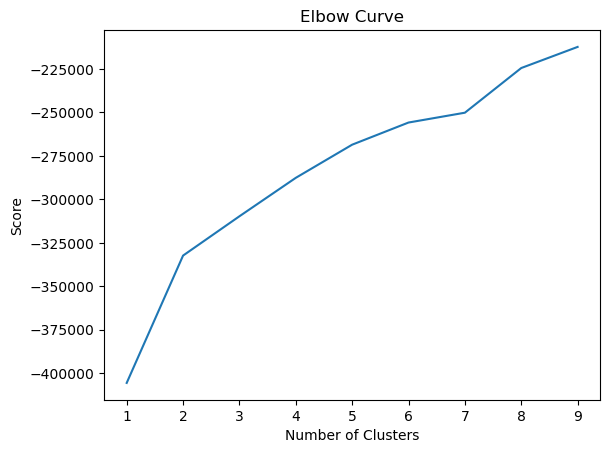

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The ideal number of clusters is where the "elbow" appears where the score's improvement slows. In this chart, the elbow is at 3 clusters, I will test clustering with 3 clusters as a starting point.

### 4. k-means clustering

In [19]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [21]:
scaled_data['clusters'] = kmeans.fit_predict(scaled_data)

The code below is to assign the 'clusters' column, predicted by k-means (from the standardized dataset), to the original dataset. This step links each cluster to the original dataset for better representation. It will be useful in the final analysis to calculate the real average and median values of each variable, providing meaningful statistical insights.

In [22]:
df['clusters'] = scaled_data['clusters']

##### Check if both datasets have the consistent count of number of each clusters

In [23]:
scaled_data['clusters'].value_counts()

clusters
1    11856
2     7665
0      758
Name: count, dtype: int64

In [24]:
df['clusters'].value_counts()

clusters
1    11856
2     7665
0      758
Name: count, dtype: int64

In [25]:
scaled_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,zipcode,sqft_living15,sqft_lot15,clusters
0,0.875917,-1.226187,-0.359728,-1.487018,-1.052369,-0.220501,-0.880086,-0.054475,-0.266227,-0.629133,...,-0.728166,-0.777237,-0.536249,-0.197188,-0.323944,-0.301476,1.859061,-0.951450,-0.258582,1
1,0.627303,0.315245,-0.359728,0.302908,0.844355,-0.179647,0.982788,-0.054475,-0.266227,-0.629133,...,0.684404,1.286609,-0.673398,5.071297,1.163098,-0.737678,0.866405,-0.367380,-0.179670,0
2,0.355261,-1.430508,-1.494947,-1.487018,-1.611834,-0.108870,-0.880086,-0.054475,-0.266227,-0.629133,...,-1.313169,-0.777237,-1.290572,-0.197188,1.282884,-0.132624,-0.950345,1.351455,-0.162888,1
3,-0.737742,0.637088,0.775492,1.376864,0.011980,-0.237182,-0.880086,-0.054475,-0.266227,2.458148,...,-0.913654,1.286609,-0.193375,-0.197188,-0.255900,-1.258307,1.072428,-0.918075,-0.284370,1
4,-0.922951,0.178706,-0.359728,-0.055077,-0.370094,-0.158142,-0.880086,-0.054475,-0.266227,-0.629133,...,-0.014747,-0.777237,0.560948,-0.197188,0.424539,1.190054,-0.088793,-0.183815,-0.185065,1


In [26]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,zipcode,sqft_living15,sqft_lot15,clusters
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,98178,1340,5650,1
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,2170,1,1951,1,47.7210,-122.319,98125,1690,7639,0
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,98028,2720,8062,1
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,1050,1,1965,0,47.5208,-122.393,98136,1360,5000,1
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,98074,1800,7503,1


### 5 Create visualizations

The objective of unsupervised machine learning (clustering) is to identify patterns in the variables by treating them equally. However, due to the large number of variables in the dataset, I will focus on specific columns of interest to uncover patterns and gain insights for the analysis. Ideally, future steps would include testing all variables, as this might reveal additional findings beneficial for the team and company.

Here are the variables I have chosen:

- Price
- Bedrooms
- Bathrooms
- Sqft_living
- Waterfront
- View
- Yr_built
- Yr_renovated

##### Price and Bedrooms

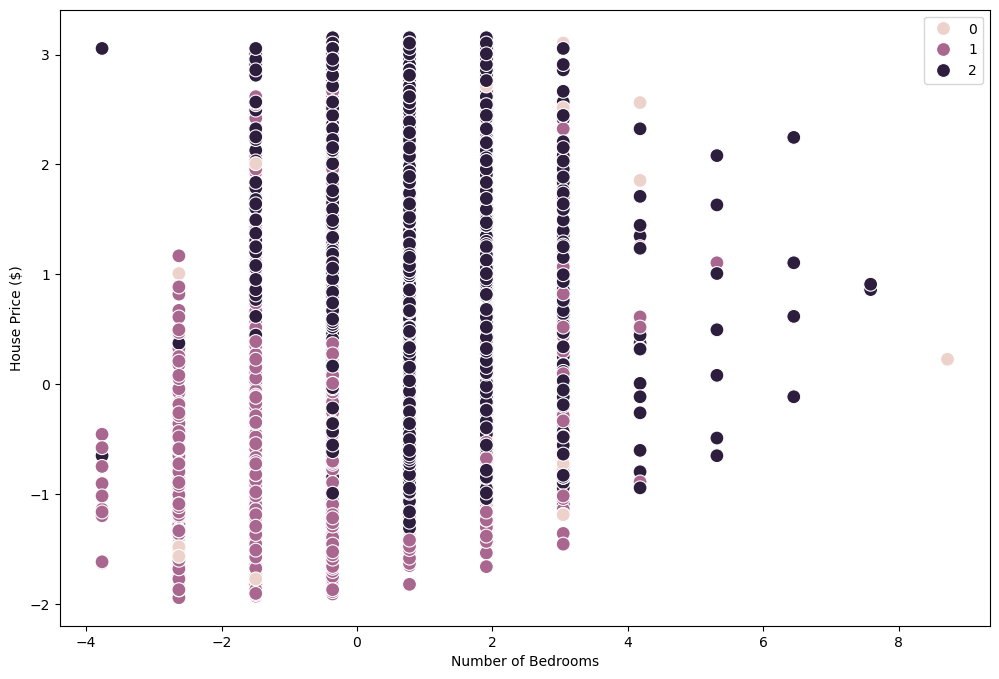

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['bedrooms'], y = scaled_data['price'], hue = kmeans.labels_, s = 100)

ax.grid(False) 
plt.xlabel('Number of Bedrooms') 
plt.ylabel('House Price ($)') 
plt.show()

##### Price and Bathrooms

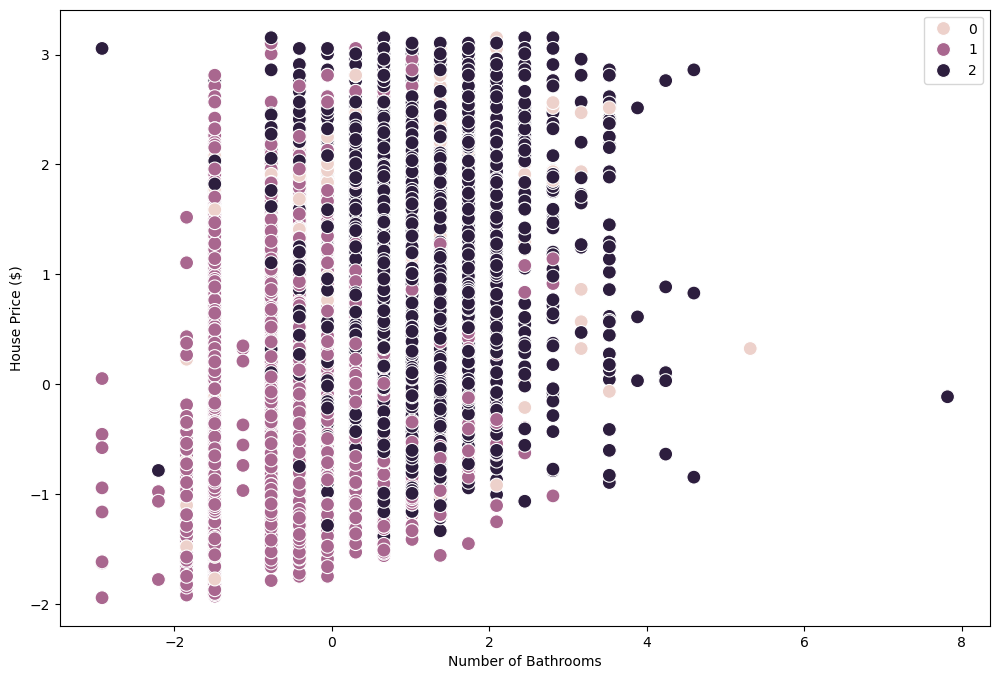

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['bathrooms'], y = scaled_data['price'], hue = kmeans.labels_, s = 100)

ax.grid(False) 
plt.xlabel('Number of Bathrooms') 
plt.ylabel('House Price ($)') 
plt.show()

##### Price and Sqft_living

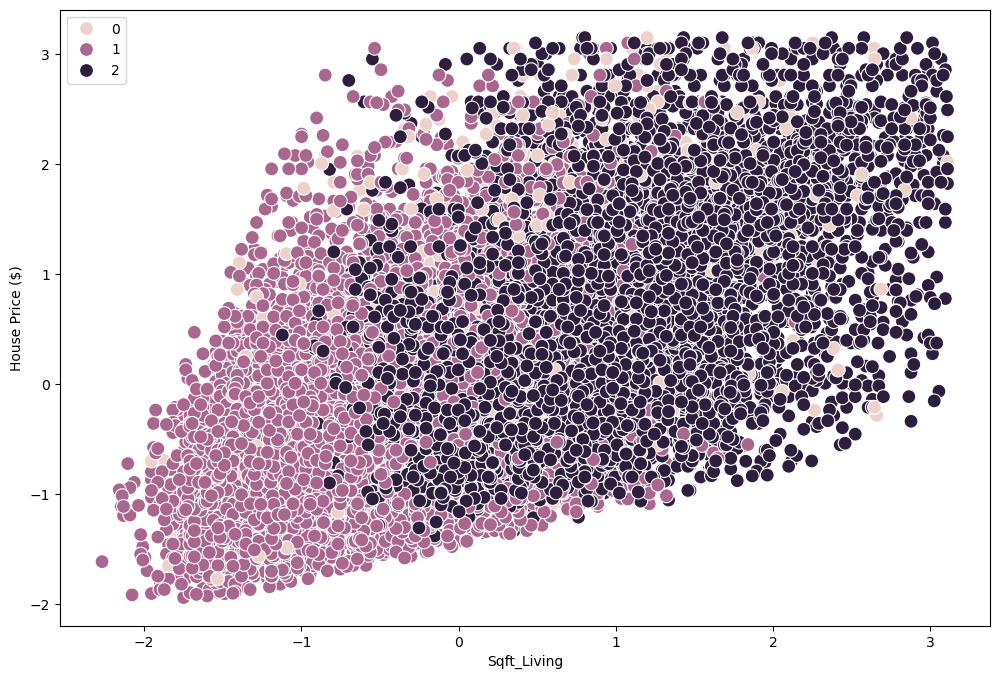

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['sqft_living'], y = scaled_data['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Sqft_Living') 
plt.ylabel('House Price ($)') 
plt.show()

##### Price and Waterfront

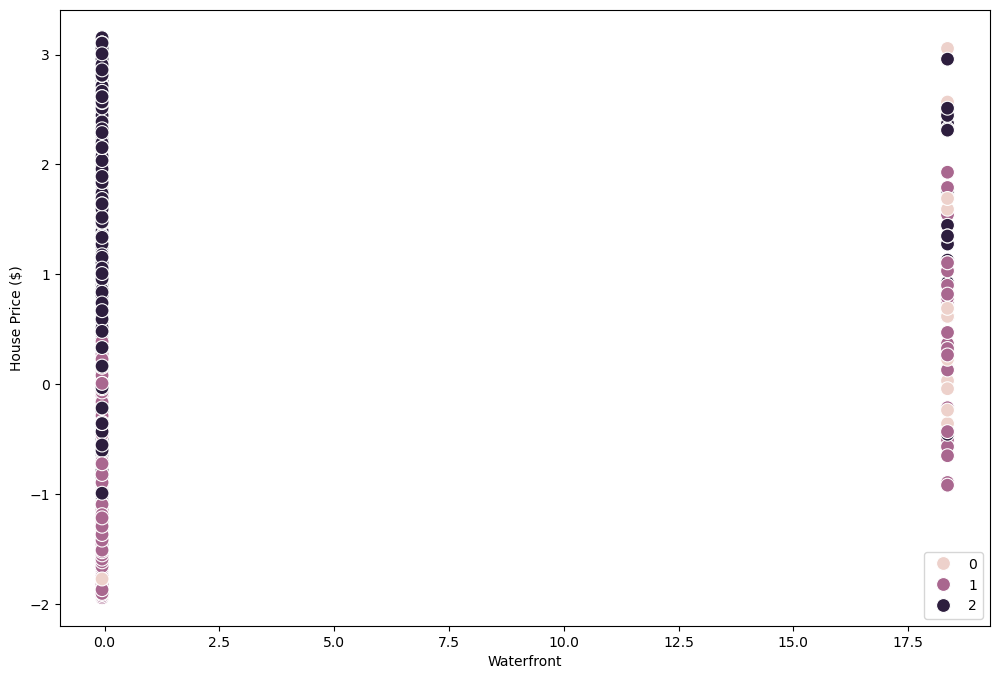

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['waterfront'], y = scaled_data['price'], hue = kmeans.labels_, s = 100)

ax.grid(False) 
plt.xlabel('Waterfront') 
plt.ylabel('House Price ($)') 
plt.show()

##### Price and View

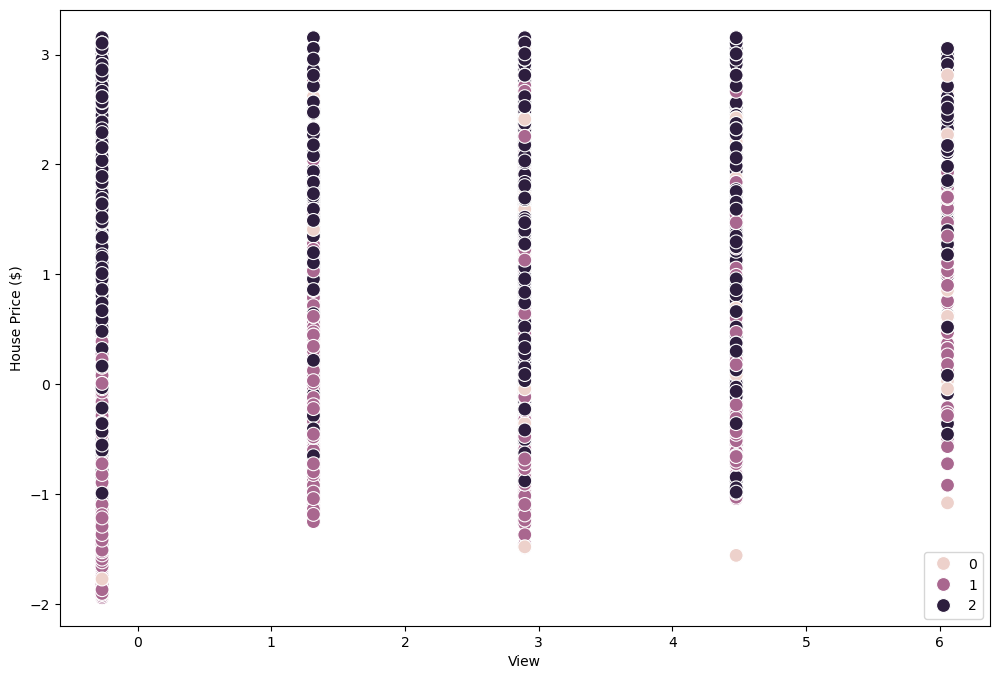

In [31]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['view'], y = scaled_data['price'], hue = kmeans.labels_, s = 100)

ax.grid(False) 
plt.xlabel('View') 
plt.ylabel('House Price ($)') 
plt.show()

##### Price and Yr_built

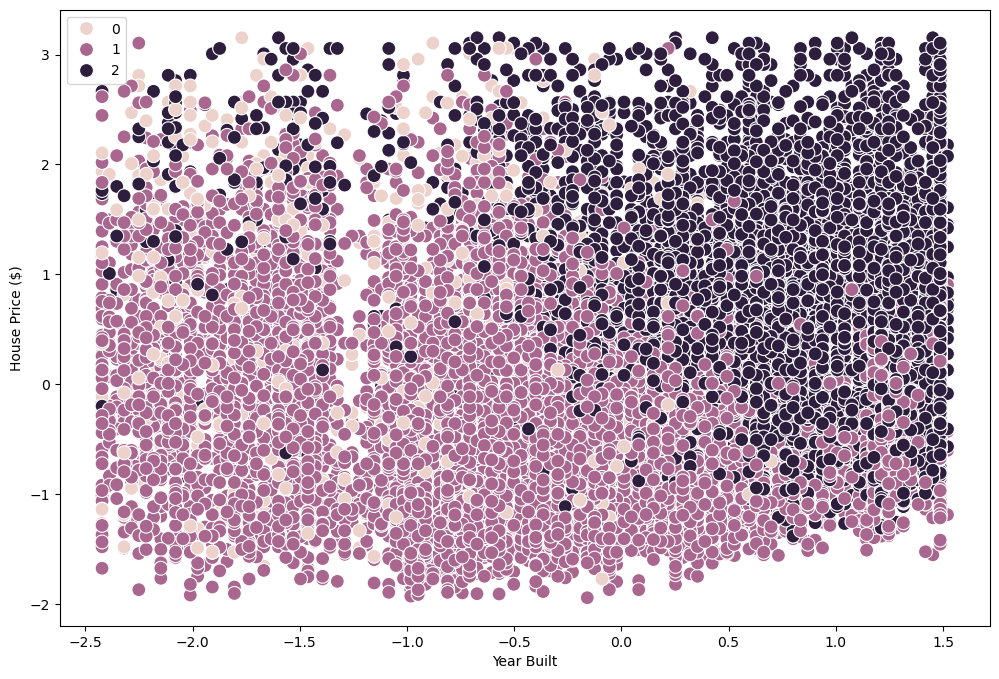

In [32]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['yr_built'], y = scaled_data['price'], hue = kmeans.labels_, s = 100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('House Price ($)') 
plt.show()

##### Price and Yr_renovated

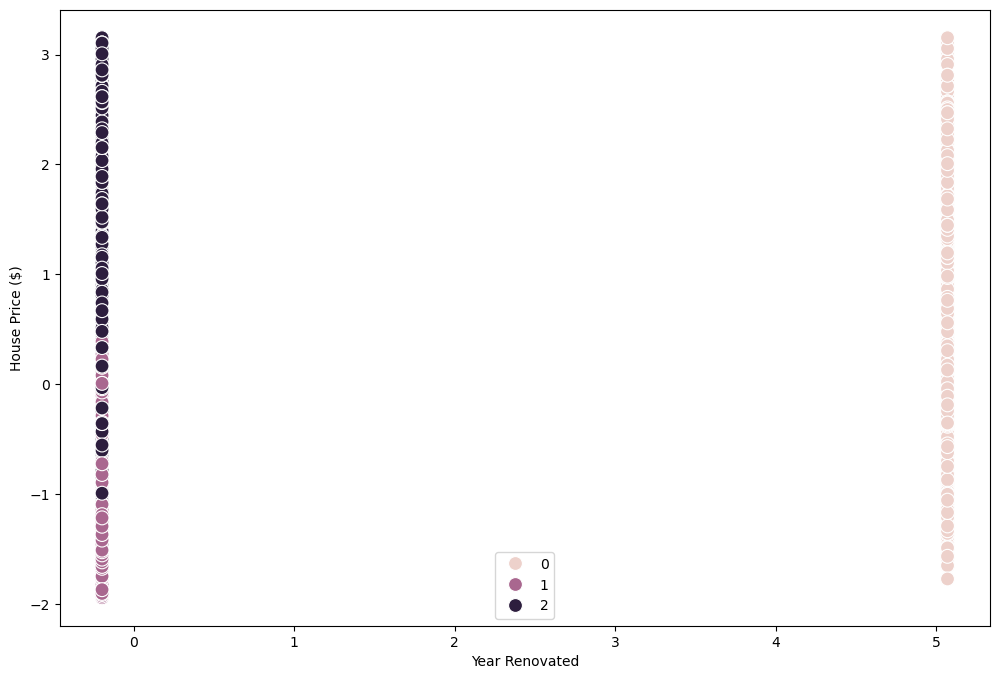

In [33]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['yr_renovated'], y = scaled_data['price'], hue = kmeans.labels_, s = 100)

ax.grid(False) 
plt.xlabel('Year Renovated') 
plt.ylabel('House Price ($)') 
plt.show()

##### Price and Grade

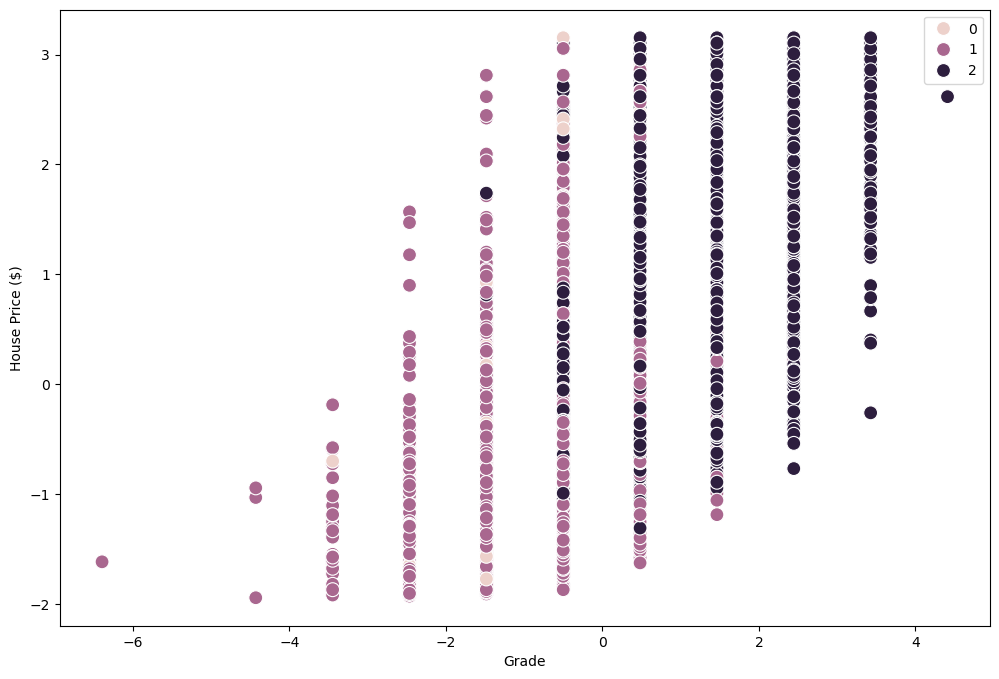

In [34]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_data['grade'], y = scaled_data['price'], hue = kmeans.labels_, s = 100)

ax.grid(False) 
plt.xlabel('Grade') 
plt.ylabel('House Price ($)') 
plt.show()

In [35]:
scaled_data.loc[scaled_data['clusters'] == 2, 'cluster'] = 'Dark Purple'
scaled_data.loc[scaled_data['clusters'] == 1, 'cluster'] = 'Purple'
scaled_data.loc[scaled_data['clusters'] == 0, 'cluster'] = 'Light Pink'

In [36]:
df.loc[df['clusters'] == 2, 'cluster'] = 'Dark Purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'Purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'Light Pink'

### 6. Discuss the clusters

Visual observations from the charts above

##### Light pink
- Bedrooms: Scattered mostly at mid to high levels, with a concentration in the mid range.
- Bathrooms: Spread across mid to high levels, with a higher density at the upper end.
- Sqft_living: Primarily at mid to high levels of square footage. Compared to the dark purple cluster with a similar pattern, the light pink cluster tends to lean slightly higher. Notably, the largest houses belong exclusively to this cluster.
- Waterfront: Includes both categories (waterfront and non-waterfront properties).
- View: Appears across all levels of the view variable, making patterns difficult to discern visually.
- Yr_built: Primarily consists of newer houses, ranging from higher to the highest levels compared to the other two clusters.
- Yr_renovated: Predominantly falls under the 'not renovated' category, with fewer instances of 'renovated.'
- Grade: Clearly falls into the upper grade levels compared to the other two clusters.

##### Purple
- Bedrooms: Primarily scattered at low to mid levels, with a higher density at the lower end.
- Bathrooms: Follows a similar pattern to the dark purple cluster but is slightly lower in comparison.
- Sqft_living: Clearly falls within the lower range of square footage, distinctly separated from the other two clusters.
- Waterfront: Includes both categories (waterfront and non-waterfront properties).
- View: Appears across all levels of the view variable, making patterns difficult to discern visually.
- Yr_built: Scattered across all levels but shows greater density at low to mid levels (older to moderately aged houses).
- Yr_renovated: Equally distributed between 'renovated' and 'not renovated.'
- Grade: Concentrated at the lower grade levels.

##### Dark purple
- Bedrooms: Scattered across all levels (from low to high) but shows greater density at the higher levels compared to the pink cluster.
- Bathrooms: Follows a similar pattern to bedrooms, with the highest density at the lower levels.
- Sqft_living: Similar to the pink cluster, scattered across mid to high levels of square footage.
- Waterfront: Includes both categories (waterfront and non-waterfront properties).
- View: Similar to the other clusters, appears across all levels of the view variable, making patterns hard to discern visually.
- Yr_built: Similar to the dark purple cluster but shows equal density across all levels of year built, unlike the others, which concentrate in specific ranges.
- Yr_renovated: Same as the purple cluster, evenly distributed between 'renovated' and 'not renovated.'
- Grade: Clearly falls within the mid-grade levels.

### 7. Calculate the descriptive statistics

In [37]:
# Standardized dataset
scaled_data.groupby('cluster').agg({'price':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                         'bathrooms':['mean', 'median'],
                         'sqft_living':['mean', 'median'],
                         'waterfront':['mean', 'median'],              
                         'view':['mean', 'median'],
                         'yr_built':['mean', 'median'],
                         'yr_renovated':['mean', 'median'],
                         'grade':['mean', 'median']})

price            bedrooms           bathrooms            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
Dark Purple  0.545826  0.434717  0.491279  0.775492  0.795587  0.660893   
Light Pink   0.432171  0.251852  0.023671 -0.359728  0.130999 -0.055077   
Purple      -0.380511 -0.516182 -0.319130 -0.359728 -0.522729 -0.413063   

            sqft_living           waterfront                view            \
                   mean    median       mean    median      mean    median   
cluster                                                                      
Dark Purple    0.848685  0.762482  -0.008836 -0.054475  0.094300 -0.266227   
Light Pink     0.109905  0.025625   0.285581 -0.054475  0.317752 -0.266227   
Purple        -0.555709 -0.615713  -0.012546 -0.054475 -0.081281 -0.266227   

             yr_built           yr_renovated               grade            
                 mean    median         mean    median      mean    median  
cluster                                                                     
Dark Purple  0.721993  0.869534    -0.196501 -0.197188  0.802960  0.480676  
Light Pink  -1.108686 -1.016272     5.071297  5.071297 -0.098553 -0.501552  
Purple      -0.395892 -0.399099    -0.197188 -0.197188 -0.512819 -0.501552

In [38]:
# Original dataset
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                         'bathrooms':['mean', 'median'],
                         'sqft_living':['mean', 'median'],
                         'waterfront':['mean', 'median'],              
                         'view':['mean', 'median'],
                         'yr_built':['mean', 'median'],
                         'yr_renovated':['mean', 'median'],
                          'grade':['mean', 'median']})

price            bedrooms        bathrooms         \
                      mean    median      mean median      mean median   
cluster                                                                  
Dark Purple  585284.940378  562500.0  3.749641    4.0  2.594064   2.50   
Light Pink   561977.840369  525000.0  3.337731    3.0  2.129947   2.00   
Purple       395321.933367  367500.0  3.035762    3.0  1.673414   1.75   

             sqft_living         waterfront             view         \
                    mean  median       mean median      mean median   
cluster                                                               
Dark Purple  2573.173646  2510.0   0.002479    0.0  0.228050    0.0   
Light Pink   2031.763852  1970.0   0.018470    0.0  0.369393    0.0   
Purple       1543.973937  1500.0   0.002277    0.0  0.116987    0.0   

                yr_built         yr_renovated            grade         
                    mean  median         mean median      mean median  
cluster                                                                
Dark Purple  1991.696934  1996.0      0.00013    0.0  8.328115    8.0  
Light Pink   1938.304749  1941.0      1.00000    1.0  7.410290    7.0  
Purple       1959.093539  1959.0      0.00000    0.0  6.988529    7.0

##### Insights from Descriptive Statistics:
The following insights are drawn from descriptive statistics, offering a clearer perspective than visual observations:

##### Light Pink Cluster
This cluster stands out with the highest statistics across almost all variables, particularly in price, sqft_living, yr_renovated, and grade, with exceptional average and median values. It represents luxurious houses with expensive prices, located in affluent neighborhoods and offering full amenities.

##### Purple Cluster
This cluster clearly has the lowest statistical values across all variables. It indicates affordable houses with the lowest prices, older properties, and fewer amenities, likely located in less wealthy neighborhoods.

##### Dark Purple Cluster
This cluster represents mid-range houses, with most variables falling at moderate levels. However, while it appears to be in the middle range, the average and median values of most variables are closer to the purple cluster than the light pink cluster. This suggests that the dark purple cluster skews toward the lower and more affordable house category, despite being classified as mid-range.

In [39]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,zipcode,sqft_living15,sqft_lot15,clusters,cluster
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,47.5112,-122.257,98178,1340,5650,1,Purple
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,1,1951,1,47.7210,-122.319,98125,1690,7639,0,Light Pink
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,47.7379,-122.233,98028,2720,8062,1,Purple
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,1,1965,0,47.5208,-122.393,98136,1360,5000,1,Purple
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,47.6168,-122.045,98074,1800,7503,1,Purple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20274,263000018,360000,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,47.6993,-122.346,98103,1530,1509,2,Dark Purple
20275,6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,47.5107,-122.362,98146,1830,7200,2,Dark Purple
20276,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,47.5944,-122.299,98144,1020,2007,1,Purple
20277,291310100,400000,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,47.5345,-122.069,98027,1410,1287,2,Dark Purple


In [40]:
df.to_csv(os.path.join(path, '5. Data_cleaned_with_clusters.csv'))